# Random Forest Model using sklearn

In [1]:

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# To Train our data
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler, normalize

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (
                             log_loss,
                             precision_score,
                             recall_score)
from sklearn.model_selection import LeaveOneOut


# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,RandomizedSearchCV



import sys
sys.path.append("../scripts")
from ml_pipeline import run_train_pipeline,dvc_get_data

In [2]:
main_df =  dvc_get_data('data/train.csv','a5499382dd37c492d562fca4cae1358cec8dc789')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Date                       1017209 non-null  object 
 4   Sales                      1017209 non-null  int64  
 5   Customers                  1017209 non-null  int64  
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  object 
 9   SchoolHoliday              1017209 non-null  int64  
 10  Week_Number                1017209 non-null  int64  
 11  Year                       1017209 non-null  int64  
 12  Day                        1017209 non-null  int64  
 13  Month       

In [3]:
df = main_df.copy()
df = df
df.set_index('Year', inplace=True)
df.shape
# df[:10000].to_csv('../data/train_send.csv')

(1017209, 24)

In [5]:
x = df.drop(columns=['Sales','Unnamed: 0','Customers'])
# x=df[['Store','Customers','Open','Promo','StateHoliday','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2']]
y = df['Sales']
# print(df.loc[:, df.columns != 'Sales'].info())
# print(y)

x = x[:10000]
y = y[:10000]

In [6]:
model = RandomForestRegressor(n_estimators = 10, random_state = 42)# .set_params(max_depth=10)
str(model)

'RandomForestRegressor(n_estimators=10, random_state=42)'

2022-05-29 10:11:37,307:logger:successfully got catagorical columns
2022-05-29 10:11:37,387:logger:successfully got catagorical columns
2022-05-29 10:11:37,389:logger:successfully got numerical columns


(7000, 21)
(3000, 21)
(7000,)
(3000,)


2022-05-29 10:11:38,222:logger:RMSE Score: 728.5889324600898
2022-05-29 10:11:38,224:logger:R2_Squared: 0.9490164716507211
2022-05-29 10:11:38,225:logger:MAE Score: 446.8973


Year
2015    16.847807
2015     3.251284
2014     6.546723
2013          NaN
2013     2.986326
          ...    
2013     5.530618
2014    15.398931
2015    13.268640
2013     5.073892
2014     9.161927
Name: Sales, Length: 3000, dtype: float64
8.720973851680034


2022-05-29 10:11:38,260:logger:Accuracy: 91.28 %.


RandomForestRegressor(n_estimators=10, random_state=42)


2022-05-29 10:11:38,837:logger:feature importnace plotted


Successfully registered model Random Forest with cleaned data_sixth_run_Sat-May-28-19:51:43-2022
Run - sixth_run is logged to Experiment - Random Forest with cleaned data


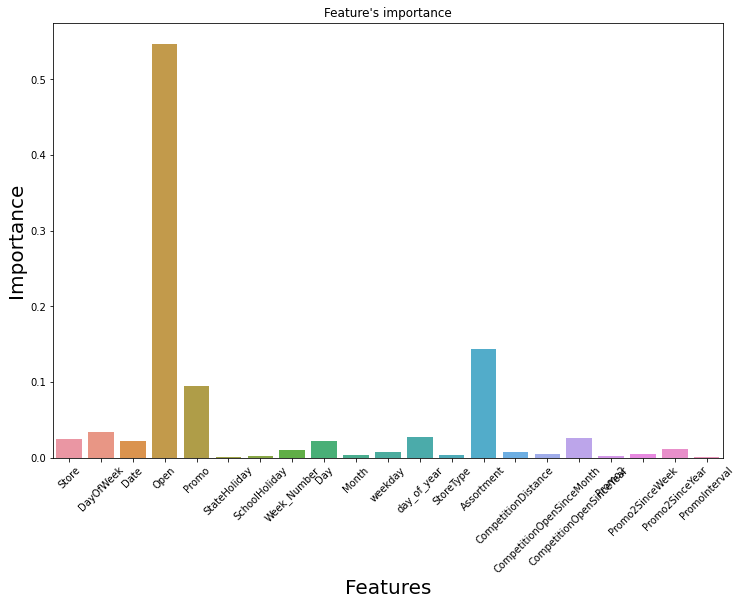

In [7]:
run_train_pipeline(model, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='sixth_run')

In [8]:
model = RandomForestRegressor(n_estimators=10)
random_grid = { #'n_estimators': 10,
            #    'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# grid_param = [{
#     "regressor": [RandomForestRegressor()],
#     "regressor__n_estimators": [10, 15],
#     "regressor__max_depth":[5, 8, 15],
#     "regressor__min_samples_leaf":[1, 2],
#     "regressor__bootstrap": [True, False],
#     "regressor__criterion": ['mse'],
#     "regressor__max_leaf_nodes": [2, 5],
#     "regressor__max_features": [2, 3],
#     "regressor__warm_start": [True, False]
# }]
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split, GridSearchCV
# # create a gridsearch of the pipeline, the fit the best model
# grid_search_pipeline = GridSearchCV(
#     Pipeline(steps=[('regressor', RandomForestRegressor())
# ]), grid_param, cv=3, verbose=0, n_jobs=-1)
# str(grid_search_pipeline)

In [9]:
run_train_pipeline(rf_random, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='fine_tuned')

2022-05-29 10:12:02,066:logger:successfully got catagorical columns
2022-05-29 10:12:02,069:logger:successfully got catagorical columns
2022-05-29 10:12:02,071:logger:successfully got numerical columns


(7000, 21)
(3000, 21)
(7000,)
(3000,)
Fitting 3 folds for each of 10 candidates, totalling 30 fits


2022-05-29 10:12:48,279:logger:RMSE Score: 744.6558282345835
2022-05-29 10:12:48,281:logger:R2_Squared: 0.9475966776170743
2022-05-29 10:12:48,283:logger:MAE Score: 452.0577818975469


Year
2015          NaN
2014     8.261761
2013     6.677993
2014    22.505079
2015     7.458625
          ...    
2014     3.531487
2013    11.217648
2014          NaN
2015    47.571931
2015     9.749060
Name: Sales, Length: 3000, dtype: float64
8.536706283939937


2022-05-29 10:12:48,294:logger:Accuracy: 91.46 %.


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=10),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)


2022-05-29 10:12:48,303:logger:'RandomizedSearchCV' object has no attribute 'feature_importances_'
2022-05-29 10:12:48,327:logger:'list' object has no attribute 'keys'


Successfully registered model Random Forest with cleaned data_sixth_run_Sat-May-28-19:51:43-2022
Run - fine_tuned is logged to Experiment - Random Forest with cleaned data
